In [1]:
import pandas as pd #for data manipulation
import numpy as np #for numerical nalysis
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization
import nltk # Natural Language tool kit 
import wordcloud
import textblob
import os
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from wordcloud import WordCloud
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load data
swahili_data=pd.read_csv('swahili.csv')

In [3]:
#view the first 10 items
swahili_data.head(10)

,Unnamed: 0,text,labels
0,0,team 2019merimera alikuwa takataka,negative
1,1,sijafurahishwa,negative
2,2,kubuni dosari,negative
3,3,bila kusema nilipoteza pesa zangu,negative
4,4,sema kupoteza pesa na wakati,negative
5,5,ubunifu ni isiyo ya kawaida sana kwani kipande...,negative
6,6,akili yako imeoza,negative
7,7,aki si maisha ni magumu,negative
8,8,enyewe safaricom ni wezi,negative
9,9,mtandao duni hata line yao niliweka nyuma ya s...,negative


In [4]:
# View the DataFrame Information
swahili_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3925 non-null   int64 
 1   text        3925 non-null   object
 2   labels      3925 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.1+ KB


In [5]:
# View DataFrame Statistical Summary
swahili_data.describe()

,Unnamed: 0
count,3925.000000
mean,1254.993631
std,885.518930
min,0.000000
25%,490.000000
50%,1037.000000
75%,2018.000000
max,2999.000000


In [6]:
#checks for null elements
swahili_data.isnull()

,Unnamed: 0,text,labels
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3920,False,False,False
3921,False,False,False
3922,False,False,False
3923,False,False,False


In [7]:
#checks for null elements
swahili_data.isnull().sum()

Unnamed: 0    0
text          0
labels        0
dtype: int64

<AxesSubplot:>

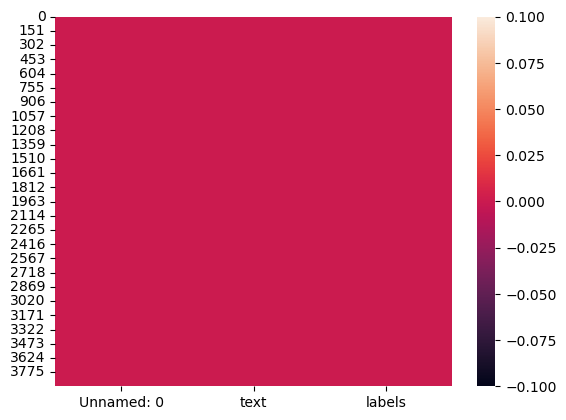

In [8]:
#checks for null elements
sns.heatmap(swahili_data.isnull())

In [9]:
#Shape in form of rows, cols
print(swahili_data.shape)

(3925, 3)


In [10]:
#feature extraction:Length of the review text
swahili_data['length']=swahili_data['text'].apply(len)
swahili_data

,Unnamed: 0,text,labels,length
0,0,team 2019merimera alikuwa takataka,negative,34
1,1,sijafurahishwa,negative,14
2,2,kubuni dosari,negative,13
3,3,bila kusema nilipoteza pesa zangu,negative,33
4,4,sema kupoteza pesa na wakati,negative,28
...,...,...,...,...
3920,2995,Nafikiri chakula chapasa kuwa na ladha na umbi...,negative,77
3921,2996,hamu ya kula ilitoweka mara moja,negative,32
3922,2997,Kwa ujumla sikuvutiwa na nisirudi nyuma,negative,39
3923,2998,Mambo yote yaliyoonwa yalikuwa chini ya kiwang...,negative,122


In [11]:
sorted_data = swahili_data.sort_values(by='length')

In [12]:
#sorts length by ascending order
swahili_data_sorted = swahili_data.sort_values(by='length', ascending=True)
print(swahili_data_sorted)

      Unnamed: 0                                               text    labels  \
2945        2020                                                kla  negative   
2418        1493                                               Ione  positive   
3090        2165                                               tamu  positive   
514          514                                               1010  positive   
2713        1788                                               1010  positive   
...          ...                                                ...       ...   
601          601  sinema hii ni bora malaika ni mzuri na scamp n...  positive   
2353        1428  matumizi ya hali ya polepole ya kihisia - moyo...  negative   
2346        1421  Filamu hii ni nzuri sana na mpunjaji ni viruka...  positive   
2545        1620  Hii ni sehemu yenye ustadi ya utengenezaji wa ...  positive   
650          650  hii ni sehemu nzuri ya utengenezaji wa filamu ...  positive   

      length  
2945       3

In [13]:
#the tail() function to displays the longest text:
print(sorted_data.tail(1)['text'])

650    hii ni sehemu nzuri ya utengenezaji wa filamu ...
Name: text, dtype: object


In [14]:
#The head() function to displays the shortest text:
print(sorted_data.head(1)['text'])

2945    kla
Name: text, dtype: object


<AxesSubplot:ylabel='Frequency'>

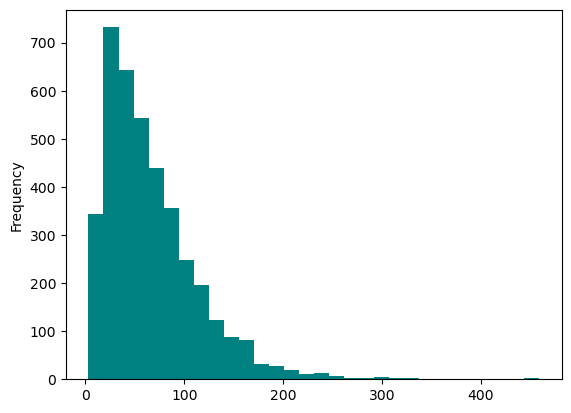

In [15]:
# Plot the histogram for the length
swahili_data['length'].plot(bins = 30, kind= 'hist', color = 'teal')

In [16]:
swahili_data['labels'].value_counts()

positive    2002
negative    1923
Name: labels, dtype: int64

In [17]:
# Obtain only the negative reviews
negative_feedback = swahili_data[swahili_data['labels'] == 'negative' ]
print(negative_feedback)

      Unnamed: 0                                               text    labels  \
0              0                 team 2019merimera alikuwa takataka  negative   
1              1                                     sijafurahishwa  negative   
2              2                                      kubuni dosari  negative   
3              3                  bila kusema nilipoteza pesa zangu  negative   
4              4                       sema kupoteza pesa na wakati  negative   
...          ...                                                ...       ...   
3920        2995  Nafikiri chakula chapasa kuwa na ladha na umbi...  negative   
3921        2996                   hamu ya kula ilitoweka mara moja  negative   
3922        2997            Kwa ujumla sikuvutiwa na nisirudi nyuma  negative   
3923        2998  Mambo yote yaliyoonwa yalikuwa chini ya kiwang...  negative   
3924        2999  Basi ni kana kwamba nilipoteza maisha yangu ya...  negative   

      length  
0         34

In [18]:
# Obtain only the positive reviews
positive_feedback = swahili_data[swahili_data['labels'] == 'positive' ]
print(positive_feedback)

      Unnamed: 0                                               text    labels  \
423          423                                yeye ni mrembo sana  positive   
424          424                          tunaipenda hii ngoma sana  positive   
425          425  yani nahisi mapenzi hadi kwa miguu naipenda ng...  positive   
426          426  waah hii ngoma ilikua imeshika nikiwa darasa l...  positive   
427          427          safi mgenge2018 na hii ngoma bado ni moto  positive   
...          ...                                                ...       ...   
3824        2899                             Mambo mengi yaliyoonwa  positive   
3826        2901  Mkate wao uliochomwa kwa ukawaida ulitosheleza...  positive   
3832        2907  vibanzi na vyombo vinavyoweza kuuzwa hapa ni v...  positive   
3834        2909           Hapa ndipo mahali ninapopaona vegas mpya  positive   
3847        2922  kila wakati nilapo hapa mimi huona ushirikiano...  positive   

      length  
423       19

In [19]:
# Convert to list format
paragraph = negative_feedback['text'].tolist()
# Join all reviews into one large string
paragraph_as_one = ' '.join(paragraph)

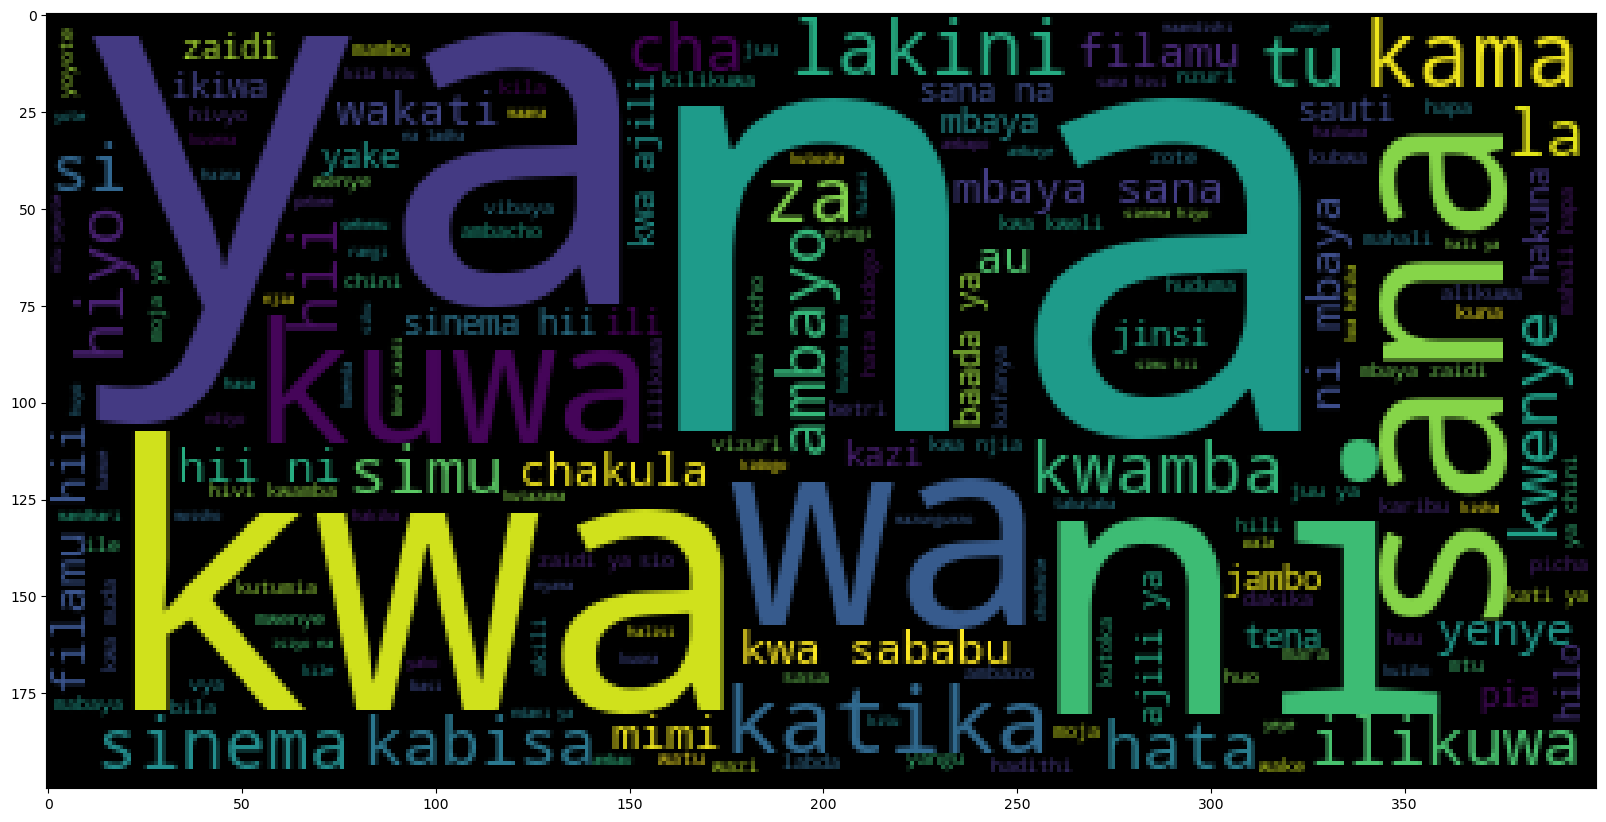

In [20]:
#negative reviews wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(paragraph_as_one))

In [21]:
# Open the stopwords file and read its contents
with open('swahili_stopwords.txt', 'r') as f:
    stopwords_contents = f.read()

# Split the contents of the file into a list of strings
stopwords_list = stopwords_contents.split()

# Remove any empty strings or whitespace from the list (optional)
stopwords_list = [string for string in stopwords_list if string.strip()]

#concatenate the stopwords both English and Swahili
Stopwords = set(stopwords.words('english') + stopwords_list)

# function to clean text
def clean_text(text):
    
    # remove punctuation
    #can use [^\w\s] or [‘’“”…,] or !"#\$%&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`{\|}~
    #[^\w\s] removes any character that is not a letter, digit, or underscore) or whitespace.^ means is not
    text = re.sub('[^\w\s]', '', text)
    
    #convert text to lowercase
    text = text.lower()
    
    #remove numbers and keep text/alphabet only
    text = re.sub("[^a-zA-Z]"," ",text)
    
    #remove parentheses
    text = re.sub('[()]', '', text)
    
    #Tokenization
    text = text.split()
    
    # remove stopwords
    text = [word for word in text if word not in Stopwords]
    
    # stem the words
    porter = PorterStemmer()
    text = [porter.stem(word) for word in text]
    
    # join the cleaned words back into a string
    text = ' '.join(text)
    
    return text

In [22]:
swahili_data['text'] = swahili_data['text'].apply(clean_text)
swahili_data

,Unnamed: 0,text,labels,length
0,0,team merimera alikuwa takataka,negative,34
1,1,sijafurahishwa,negative,14
2,2,kubuni dosari,negative,13
3,3,bila kusema nilipoteza pesa zangu,negative,33
4,4,sema kupoteza pesa wakati,negative,28
...,...,...,...,...
3920,2995,nafikiri chakula chapasa kuwa ladha umbil vyot...,negative,77
3921,2996,hamu kula ilitoweka mara moja,negative,32
3922,2997,ujumla sikuvutiwa nisirudi nyuma,negative,39
3923,2998,mambo yote yaliyoonwa yalikuwa kiwango cha nad...,negative,122


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
#Feature extraction using TfidfVectorizer 
#fit_transform: learns vocabulary and idf & returns document term matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(swahili_data['text'])
y = swahili_data['labels']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#create training and testing sets
#test size rep % of data in test set.
#random_state controls randomization during splitting
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3140, 7264)
(3140,)
(785, 7264)
(785,)


In [27]:
#Uses Naives Bayes algorithm to train the model
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #classification_report

In [29]:
# Evaluate nb_model performance
y_pred = nb_model.predict(X_test)

accuracy_level = accuracy_score(y_test, y_pred)*100
precision_level = precision_score(y_test, y_pred, average='weighted')*100
recall_score_level= recall_score(y_test, y_pred, average='weighted')*100
f1_score_level = f1_score(y_test, y_pred, average='weighted')*100

print('Accuracy:', accuracy_level)
print('Precision:', precision_level)
print('Recall Score:', recall_score_level)
print('F1_score:', f1_score_level)

Accuracy: 76.81528662420382
Precision: 76.88171717886047
Recall Score: 76.81528662420382
F1_score: 76.77634202968218


In [30]:
# Use the nb_model to make predictions on new text data
# Replace the new text in place of Mtoto huyo ana bidii
analyze_text = ['Mtoto huyo ana bidii']
clean_new_text = [clean_text(text) for text in analyze_text]
new_X = vectorizer.transform(clean_new_text)
new_y = nb_model.predict(new_X)
print('Predictions:', new_y)

Predictions: ['positive']
